(plastics-processing)=
# Fallstudie: Energiebilanz einer Spritzgießmaschine

:::{admonition} **Lernziele**
- Industrielle Anlagen auf Energiesparpotenziale hin untersuchen
- am Beispiel einer Spritzgießmaschine
- um auch andere spezialisierte industrielle Anlagen bewerten zu können
:::

## python konfigurieren

### Module importieren

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
import pandas as pd
import seaborn as sns
import shutil

print('Versionen der verwendeten python-Module: ')
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('seaborn', sns.__version__)
print('shutil', shutil)

Versionen der verwendeten python-Module: 
matplotlib 3.9.2
pandas 2.2.3
seaborn 0.13.2
shutil <module 'shutil' from '/home/franzi/.pyenv/versions/miniconda3-latest/lib/python3.12/shutil.py'>


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if shutil.which('latex'): plt.rcParams['text.usetex'] = True

## Vorgehensweise

Wie im Abschnitt [Systemtechnische Vorgehensweise](sye-vorgehensweise) beschrieben, ist es wichtig, die folgenden Schritte durchzuführen:

1. Anforderungen analysieren
2. Systemgrenzen festlegen
3. Einflussstärken von Effekten analysieren
4. Lösungen finden
5. Anhand der Anforderungen analysieren und bewerten

## Anforderungen an einen Spritzgießprozess analysieren

Der erste Schritt, die Analyse der Anforderungen, ist nicht ganz so einfach, wenn man nicht selbst auch Prozessingenieur ist und genau weiß, auf was es ankommt, damit die Qualität stimmt: In der Regel kommt es bei Produktionsmaschinen darauf an, dass die damit durchgeführten Prozessschritte wiederholbar mit hoher Ausbeute in der geforderten Geschwindigkeit funktionieren. Hohe Ausbeute bedeutet, dass nur minimal (am besten gar keine) fehlerhaften Teile entstehen, d.h. dass möglichst alle produzierten Teile alle technisch definierten Anforderungen einhalten. Die Produktionsgeschwindigkeit beinhaltet, dass genügend Gut-Teile (d.h. fehlerfreie) Teile für nachfolgende Prozessschritte produziert werden, so dass auch diese ohne Wartezeiten weitermachen können. Dies bedeutet also auch, dass ggf. Rüstzeiten, d.h. Zeiten, in denen Werkzeuge getauscht werden, oder Hochfahrzeiten (bei Schichtbeginn, nach Pausen) so bemessen sind, dass nachfolgende Prozesse nicht warten müssen.

Wenn man sich mit der zu optimierenden Anlage nicht auskennt, ist es daher sinnvoll, sich erst mal über den durchzuführenden Prozess zu informieren.

**Was macht eine Spritzgießmaschine?**

[Animation 3 Minuten Dauer](https://www.youtube.com/watch?v=ACf3SqlZ0vQ&feature=youtu.be)

:::{admonition} **AUFGABE**
Welche Anforderungen müssen Sie für so einen Spritzgießprozess abfragen, bevor Sie über Energieeffizienzmaßnahmen nachdenken?
:::

*Antwort*:...

### Kontaktaufnahme (VDI 3922)

Die **VDI 3922** sieht für die Energieberatung als ersten Schritt die **Kontaktaufnahme** vor, die dazu dient, Randbedingungen zu erfragen, aus denen sich Anforderungen an Systeme ableiten lassen.

<a title="en:User:Polyparadig, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Mint_box_polypropylene_lid.JPG"><img width="256" alt="Mint box polypropylene lid" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Mint_box_polypropylene_lid.JPG/256px-Mint_box_polypropylene_lid.JPG"></a>

| **Informationsart** | **Mögliche Antwort eines kunststoffverarbeitenden Betriebs** |
|-|-|
| Produkte und Produktionsverfahren| Spielzeug |
| produktionstechnische Anlagen | 10 Linien zur Kunststoffverarbeitung |
| versorgungstechnische Anlagen | Druckluftsystem, Beleuchtung |
| Arbeitszeiten | Drei-Schicht-Betrieb durchgängig |
| Energiebezug | 10 GWh/Jahr | 
| Energieerzeugung | PV auf dem Hallendach |
| installierte Messtechnik | Energiezähler am Stromübergabepunkt, Gaszähler |
| Abwärme | unbekannt |
| Entwicklung | Firma wächst, da Kitas diese Art von Spielzeug gerne einsetzen | 
| Organigramm | Firma gehört seit zwei Jahren Investor, Chefs ausgetauscht |

:::{admonition} **AUFGABE**
Welche Informationen fehlen? Welche Informationen empfiehlt die VDI 3922 zusätzlich abzufragen? Wie könnte man das besser bewerten?
:::

*Antwort:...*

### Brancheninfos recherchieren (VDI 3922)

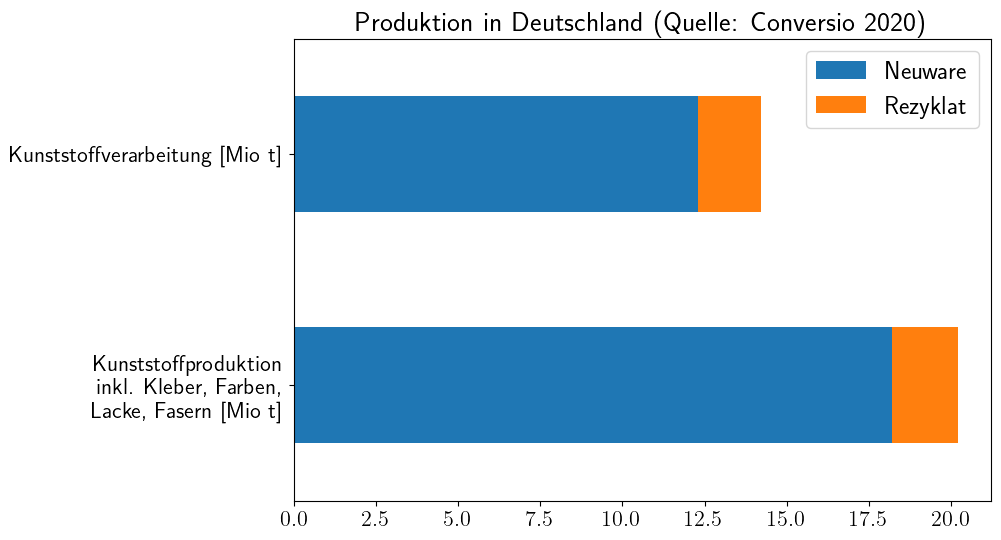

In [3]:
produced2019 = 20.2 # Mio t
new2019 = 18.2 # Mio t
recycled2019 = 2 # Mio t
processed2019 = 14.2 # Mio t
processedrecycled2019 = 1.9 # Mio t
eoltreated = .99 # %
eolrecycled = .47 # %
eolenergetic = .53 # %
data = {'Neuware': [new2019,processed2019-processedrecycled2019],
       'Rezyklat': [recycled2019,processedrecycled2019]}
index = ['Kunststoffproduktion \ninkl. Kleber, Farben, \nLacke, Fasern [Mio t]', 'Kunststoffverarbeitung [Mio t]']
plastics2019 = pd.DataFrame(index = index, data = data)
plastics2019.plot(kind = 'barh', stacked=True, figsize=(9,6))
plt.title('Produktion in Deutschland (Quelle: Conversio 2020)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

in 2019 wurden zudem 99% der Kunststoffabfälle verwertet {cite:p}`conversio_kurzfassung_2020` 
- 47% stofflich (werkstofflich)
- 53% energetisch

{cite:p}`plasticseurope_plastics_2019` nennt für Europa
- über 1,5 Mio. Beschäftige in der europäischen Kunststoffindustrie
- knapp 60.000 Firmen, die meisten KMUs
- über 350 Billionen Euro Umsatz in 2017
- Produktionswachstum von 60 Mio. t in 2016 auf 64.4 Mio. t in 2017 (weltweit 335 Mio. t auf 348 Mio. t gesunken im selben Zeitraum)
- 18,5% der weltweiten Kunststoffproduktion
- bezogen auf 27,1 Mio. t Plastikabfälle, die eingesammlet wurden: 2016 war der Recyclinganteil mit 31,1% (63% innerhalb der EU, 37% außerhalb) zum ersten Mal höher als der Deponieanteil mit 27,3%, der Energierückgewinnungsanteil überwiegt aber mit 41,6%

Aus {cite:p}`Dunkelberg_Plastik` ist zu entnehmen, dass Spritzgießbetriebe unterschiedliche Geschäftsmodelle verfolgen:
- **integrierte Spritzgießer** gehören zu Unternehmen, die Produkte oder Komponenten herstellen, bei denen nicht nur Spritzgießen als Prozess eine Rolle spielt, sondern auch andere Verarbeitungsschritte
- **eigene Markenprodukte** sind Produkte aus Kunststoff, die Hersteller selbst fertigen, z. B. könnte das bei playmobil, lego und tupperware der Fall sein
- **Zuliefer- bzw. Lohnspritzer** stellen Kunststoffteile für Kunden her, die diese unter eigener Marke weiterverarbeiten oder -verkaufen

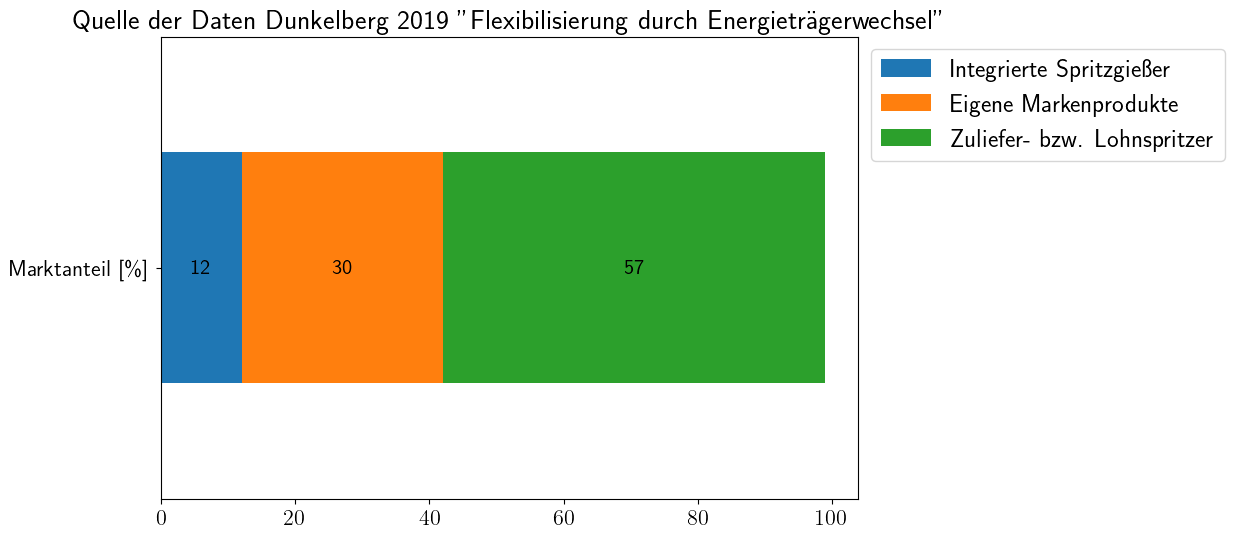

In [4]:
data2 = {'Integrierte Spritzgießer': [12],
        'Eigene Markenprodukte': [30],
        'Zuliefer- bzw. Lohnspritzer': [57]}

index = [r'Marktanteil [\%]']

injmold = pd.DataFrame(index=index, data=data2)
ax = injmold.plot(kind = 'barh', stacked = True, title = 'Quelle der Daten Dunkelberg 2019 "Flexibilisierung durch Energieträgerwechsel"', figsize=(9,6))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center', fontsize='15')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Der typische Aufbau eines Spritzgussunternehmens (angelehnt an {cite:p}`Dunkelberg_Plastik`) ist in der folgenden Abbildung dargestellt:

![Spritzgussunternehmen](../img/Spritzgussunternehmen.jpg)

**Verarbeitungsschritte in der Kunststoffverarbeitung** zeigt {cite:p}`hesselbach_energie-_2012` auf:

1. Rohstoff
2. Vorbehandlung
3. Hauptverarbeitung
4. Nachbehandlung
5. Endprodukt

zusätzlich **Nebenprozesse**: Transporte von und zu den Prozessen, technische Gebäudeausrüstung (TGA), Energieversorgung

Energieaufwand in der Kunststoffindustrie?
{cite:p}`weis_energieeffizienz_2016` nennt für die Energiekosten der deutschen Hersteller 2013 einen durchschnittlichen Anteil von 2,9% am Umsatz

## Systemgrenzen festlegen

In {cite:p}`Dunkelberg_Plastik` findet sich der Aufbau einer Spritzgießmaschine (SGM) zusammen mit den zugehörigen Energieflüssen. Die Bedeutung der Variablennamen ist $P$ für elektrische Wirkleistung, $\dot{Q}$ für Wärme und $\dot{H}$ für stoffliche Flüsse (z. B. Abgas, Kühlwasser, Hydrauliköl, Material).

![Spritzgussmaschine](../img/Spritzgussmaschine.jpg)

Wir legen zunächst die Systemgrenzen so fest, dass das gestrichelte Rechteck um die Spritzgießmaschine herum enthalten ist.

## Einflussstärken von Effekten analysieren

:::{admonition} **AUFGABE**
Sammeln Sie Effekte auf den Energiebedarf beim Spritzgießen. Welche davon könnten besonders relevant sein?
:::

*Antwort*:...

### Istzustand erfassen (VDI 3922)

| **Informationsart** | **Mögliche Antwort** |
|-|-|
| Energielieferverträge und Rechnungen | 10.000.000 kWh Strom für 10.000 t/a Produktionsmenge, mit konstantem Wachstum von 10% pro Jahr in den letzten drei Jahren, außerdem 5.000.000 kWh Wärme aus Gas pro Jahr, mit entsprechender Steigerung wie Strom, Druckluft über Contracting|
| technische Daten der Energieinfrastruktur | Netzanschluss mit Transformator auf Mittelspannungsebene, unterbrechungsfreie Stromversorgung für Notbetrieb |
| Baupläne, Installations- und Leitungspläne | vorhanden | 
| Stoff- und Energieflussschemata | neu zu erstellen |
| vorhandene Messdatenerfassung und -auswertung | Zählerinfrastruktur Strom, Gas, Wasser |
| Entsorgung | Kunststoffreste, Abwasser |
| behördliche Auflagen | nahe Wohnhäuser: Schallschutz |
| Emissionen | unklar, ob aktuelle Daten vorhanden |

:::{admonition} **AUFGABE**
Welche zusätzlichen Informationen sollten durch Messungen erfasst werden? Wie lange sollen die Messkampagnen dauern? Welche Messungen empfehlen Sie?
:::

*Antwort:...*

### Energiebezugsprofil (VDI 3922)

Da es sich um ein fiktives Unternehmen handelt, existiert kein realer Datensatz. Stattdessen betrachten wir den Strombezug eines Kemptener KMU, das Daten auf der Plattform [openmeter](https://www.openmeter.de) zur Verfügung stellt.

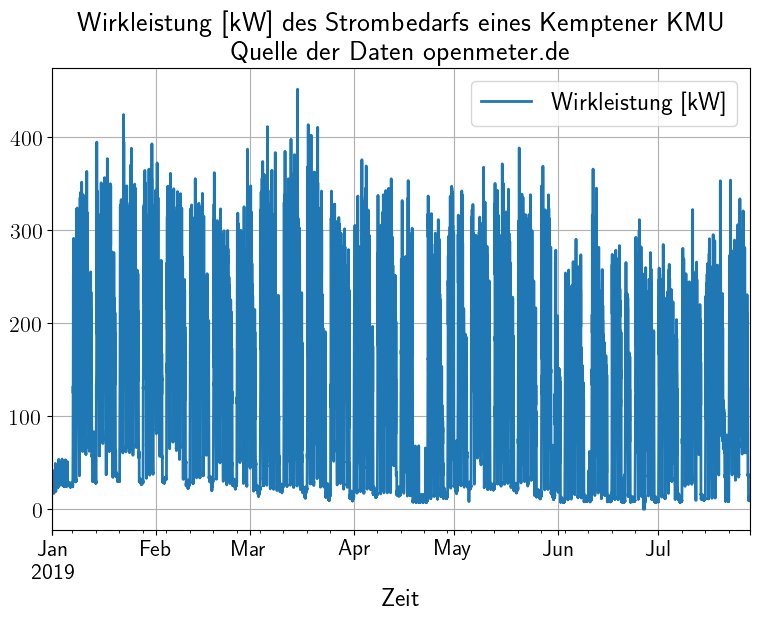

In [5]:
df3 = pd.read_csv('../data/4f9f9b2b-a17c-4073-8c92-6f8addd03a89.csv', parse_dates = [0], 
                 names = ['Zeit', 'Wirkleistung [kW]'], skiprows = 1) # KMU, Kempten
df3.set_index('Zeit', inplace = True)
df3['Jahr'] = df3.index.year
df3['Monat'] = df3.index.month
df3['Wochentag'] = df3.index.weekday
fig, ax = plt.subplots()
df3.plot(y='Wirkleistung [kW]', title='Wirkleistung [kW] des Strombedarfs eines Kemptener KMU\nQuelle der Daten openmeter.de', ax = ax, figsize=(9,6))
plt.grid()
plt.show()

Dieses Halbjahresprofil lässt erahnen, dass im Wochenrhythmus produziert wird. Außerdem ist zu Weihnachten und Ende April eine geringere Last zu verzeichnen, was Betriebsferien vermuten lässt.

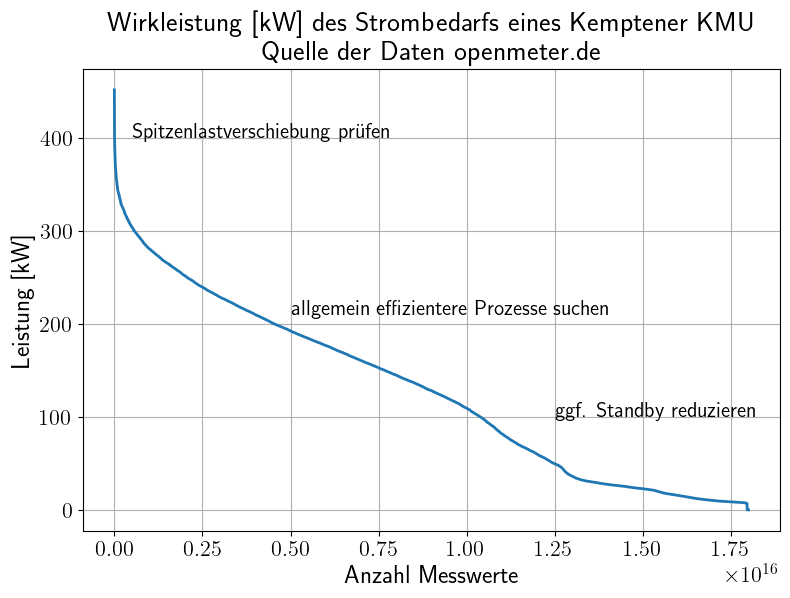

In [6]:
sorted_df3 = sorted(df3['Wirkleistung [kW]'], reverse = True)
plt.figure(figsize=(9,6))
plt.plot(df3.index-df3.index[0],sorted_df3)
plt.title('Quelle der Daten openmeter.de')
plt.xlabel('Anzahl Messwerte')
plt.ylabel('Leistung [kW]')
plt.text(.05e16,400,'Spitzenlastverschiebung prüfen', fontsize='15')
plt.text(.5e16,210,'allgemein effizientere Prozesse suchen', fontsize='15')
plt.text(1.25e16,100,'ggf. Standby reduzieren', fontsize='15')
plt.title('Wirkleistung [kW] des Strombedarfs eines Kemptener KMU\nQuelle der Daten openmeter.de')
plt.grid()
plt.show()

Die Dauerlinie zeigt keine klaren Unterschiede zwischen Standby und allgemein effizienteren Prozessen. Es ist daher fraglich, ob es sich hier um Standby-Bedarfe handelt, die tatsächlich nur an Wochenenden und nachts anfallen, oder ob diese auch tagsüber immer wieder auftreten. Die Spitzenlsaten sind recht hoch, verglichen mit dem Bedarf. Es könnte sich lohnen, einen kleineren Transformator zu verwenden, wenn der andere ausgetauscht wird.

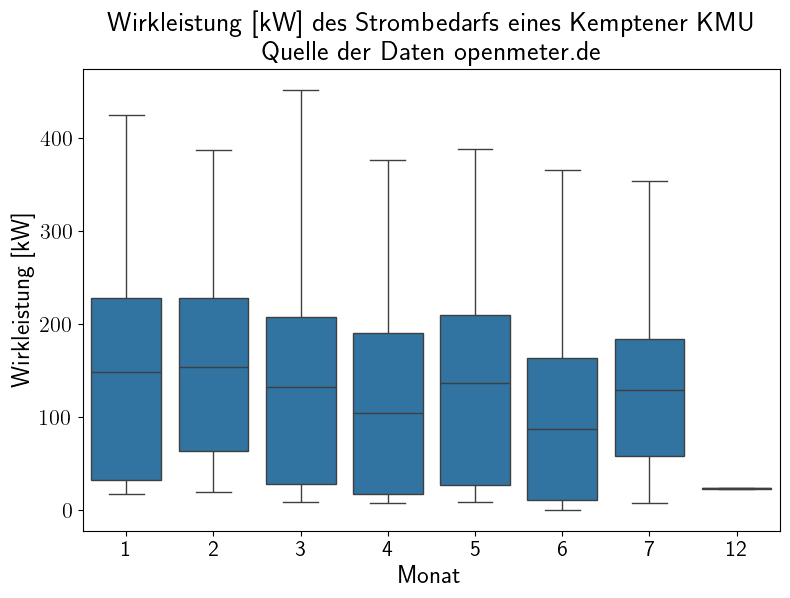

In [7]:
fig2, ax2 = plt.subplots(figsize=(9,6))
sns.boxplot(data=df3, x='Monat', y='Wirkleistung [kW]', ax=ax2)
plt.title('Wirkleistung [kW] des Strombedarfs eines Kemptener KMU\nQuelle der Daten openmeter.de')
plt.show()

Der Boxplot zeigt auf, dass im Sommer geringfügig weniger elektrische Leistung abgerufen wird. Offenbar sind die hauptsächlichen Verursacher des Strombedarfs wenig von der Außentemperatur bzw. der Jahreszeit abhängig.

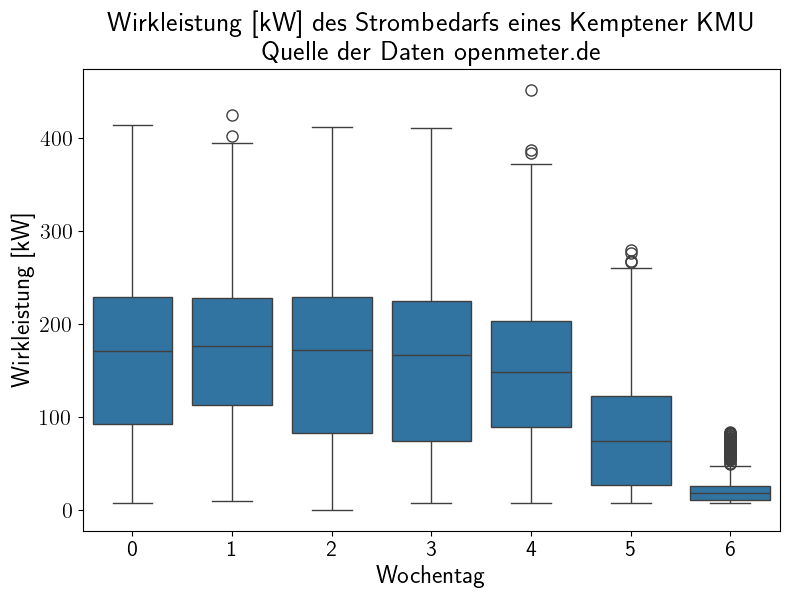

In [8]:
fig3, ax3 = plt.subplots(figsize=(9,6))
sns.boxplot(data = df3, x = 'Wochentag', y= 'Wirkleistung [kW]')
plt.title('Wirkleistung [kW] des Strombedarfs eines Kemptener KMU\nQuelle der Daten openmeter.de')
plt.show()

Dieser Boxplot bestätigt, dass montags bis freitags gearbeitet wird, samstags nur in der Hälfte der Zeit und sonntags gar nicht.

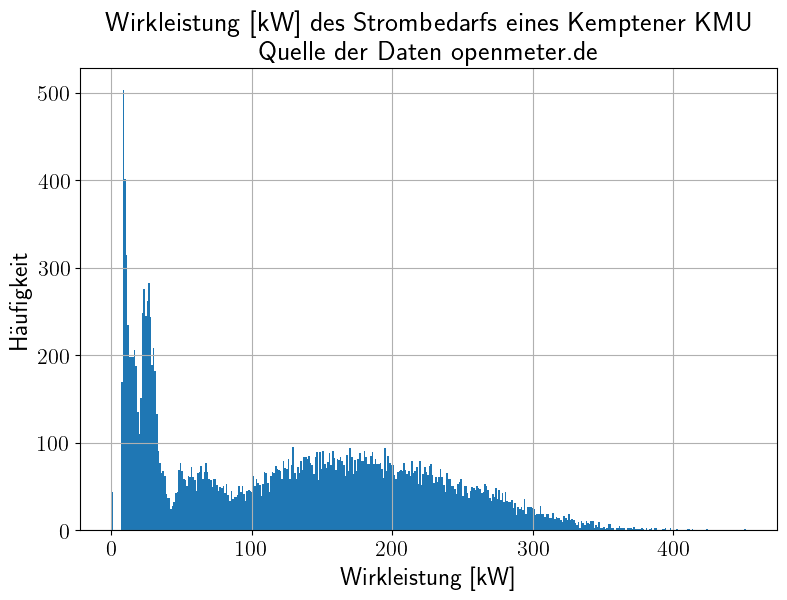

In [9]:
plt.figure(figsize=(9,6))
df3['Wirkleistung [kW]'].hist(bins = 400)
plt.xlabel('Wirkleistung [kW]')
plt.ylabel('Häufigkeit')
plt.title('Wirkleistung [kW] des Strombedarfs eines Kemptener KMU\nQuelle der Daten openmeter.de')
plt.show()

Das Histogramm zeigt sozusagen die Ableitung der Dauerlinie auf: hohe Leistungen sind tatsächlich sehr selten nötig. Eine kleinere Netzanschlussleistung sollte geprüft werden. Zudem fällt auf, dass mittlere Leistungen ähnlich häufig sind, wie man auch schon in der Dauerlinie erkennen konnte.

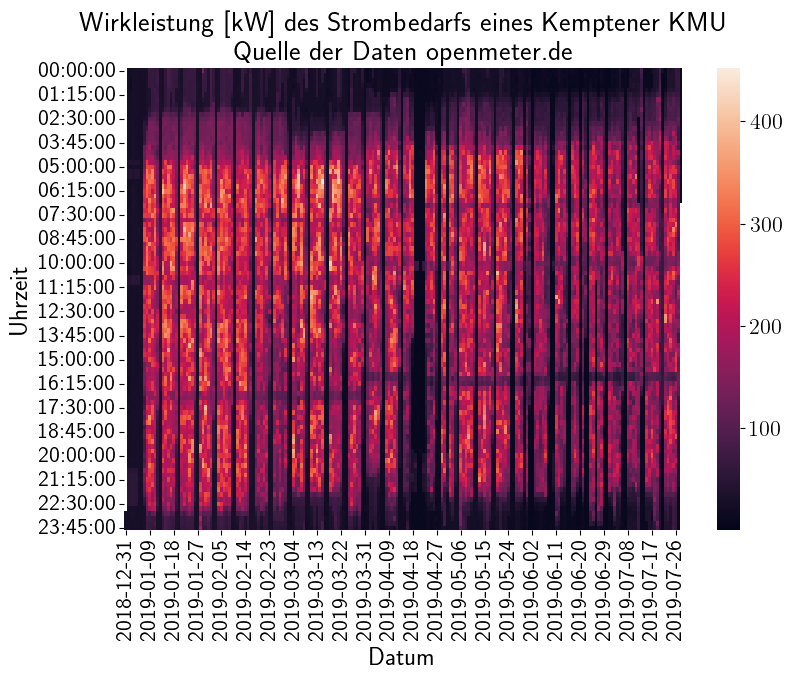

In [10]:
hm_df3 = pd.DataFrame({'Wirkleistung [kW]': df3['Wirkleistung [kW]']})
hm_df3['Datum'] = df3.index.date
hm_df3['Uhrzeit'] = df3.index.time
fig3, ax3 = plt.subplots(figsize=(9,6))
sns.heatmap(hm_df3.pivot(index = 'Uhrzeit', columns = 'Datum', values = 'Wirkleistung [kW]'))
ax3.set_title('Wirkleistung [kW] des Strombedarfs eines Kemptener KMU\nQuelle der Daten openmeter.de')
plt.show()

In der Heatmap bestätigt sich der Tages- und Wochenrhythmus, der oben vermutet worden war. Es wird zudem deutlich, dass offenbar im Zweischichtbetrieb gefahren wird, da der Strombedarf um Mitternacht recht gering ist.

Eine Literaturrecherche zeigt auf, wo die Energiebedarfe beim Spritzgießen typischerweise liegen:

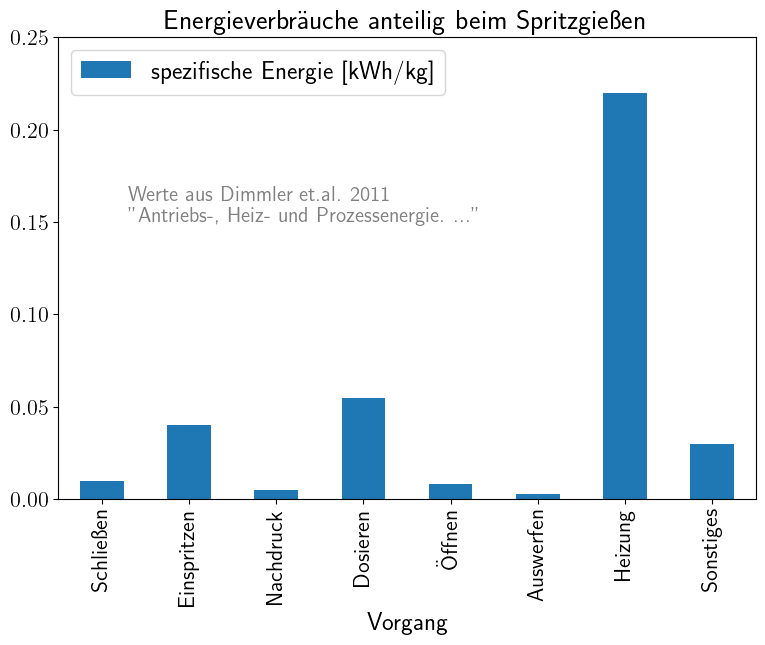

In [11]:
fig,ax = plt.subplots(figsize=(9,6))
spritzgiessenergieverbrauche = [['Schließen', 0.01], ['Einspritzen', 0.04], ['Nachdruck', 0.005], ['Dosieren', 0.055], ['Öffnen', 0.008], ['Auswerfen', 0.003], ['Heizung', 0.22], ['Sonstiges', 0.03]]
spritzgiessEnergie = pd.DataFrame(spritzgiessenergieverbrauche, columns = ['Vorgang', 'spezifische Energie [kWh/kg]'])
spritzgiessEnergie.plot.bar(x = 'Vorgang', y = 'spezifische Energie [kWh/kg]', title='Energieverbräuche anteilig beim Spritzgießen',ax=ax)
ax.set_ylim(0,0.25)
ax.text(0.3,0.15,'Werte aus Dimmler et.al. 2011 \n"Antriebs-, Heiz- und Prozessenergie. ..."', color = 'gray', fontsize='15')
plt.show()

Um zu untersuchen, welche Potenziale der Heizvorgang bietet, betrachten wir den Energiebedarf beim Heizen in `../data/sgm_aufheizen.csv`. Sie wurden aus {cite:p}`Dunkelberg_Plastik` mit dem Werkzeug in `../08/SYE-efficiencycurve.ipynb` erstellt.

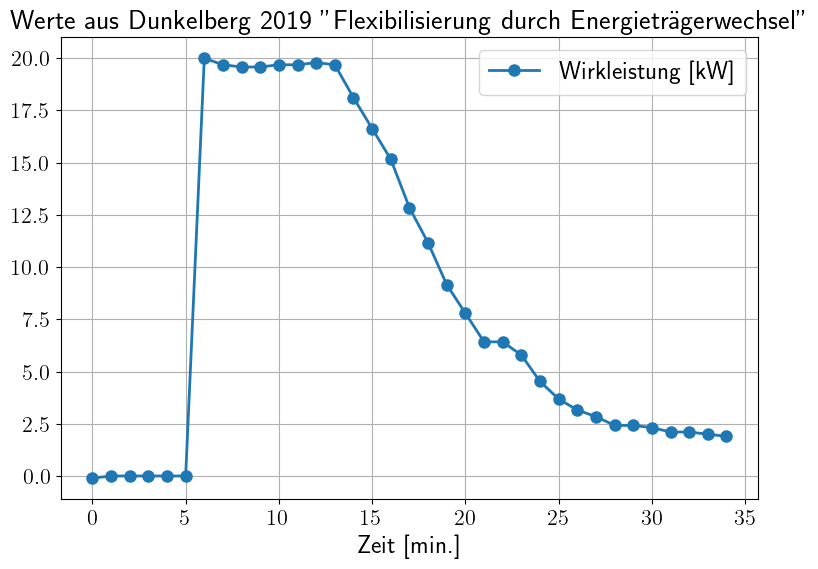

In [12]:
heating = pd.read_csv('../data/sgm_aufheizen.csv', header=0)
heating.index.rename('Zeit [min.]', inplace=True)
heating.plot(y=['Wirkleistung Heizen [kW]'], marker='o', title = 'Werte aus Dunkelberg 2019 "Flexibilisierung durch Energieträgerwechsel"',figsize=(9,6))
plt.grid()
plt.show()

Der Effekt ist jedenfalls so beträchtlich, dass es sich lohnen wird, im nächsten Abschnitt nach Lösungen zur Verringerung zu suchen.

### Energieinfrastruktur - aus Begehung ersichtlich (VDI 3922)

im fiktiven Betrieb sind zu sehen
- Photovoltaikanlage auf dem Hallendach
- Druckluftaggregat
- Heizkraftwerk für Heizung im Winter
- Wärmetauscher, Transformator
- Wärmenetz für Heißwasser und Kühlwasser
- Druckluftnetz
- Gasnetz
- Brauch- und Abwassernetze
- Pumpen für die Verteilung
- Druckspeicher
- Akkumulatoren in der unterbrechungsfreien Stromversorgung

### Energieverbraucher

wichtigste Anlagen sind Spritzgießanlagen

Mögliches Datenblatt solch einer Maschine {cite:p}`mauser_packaging_datenblatt_2020`:
- 2 m³ Druckluft pro Minute
- 35 m³ Kaltwasser pro Stunde
- 285 kW elektrischer Anschluss
- durchschnittlicher Verbrauch 171 kWh

weitere Energieverbraucher:
- Druckluftaggregat
- Beleuchtung
- Aufzüge

### Energierückgewinnung

bisher findet keinerlei Energierückgewinnung statt

### Emissionen

eine aktuelle Emissionsmessung steht an, die Ergebnisse sind noch nicht bekannt

### Ist-Zustand darstellen (VDI 3922)

Es ergibt sich ein ähnliches Bild wie in der Fallstudie in {cite:p}`hesselbach_energie-_2012`: 
- 100% Primärenergiebedarf
- 56,9% Verluste
- 16,5% Technische Gebäudeausrüstung (TGA)
- 18,2% Maschine
- 8,4% Blasformprozess

Zusätzlich zur Hilfe für das Sankey-Modul in `matplotlib` beschreibt auch {cite:p}`frolians_blog_tutorial_2016`, wie man Sankey-Diagramme in python erstellen kann und das Folgende ist daran angelehnt.

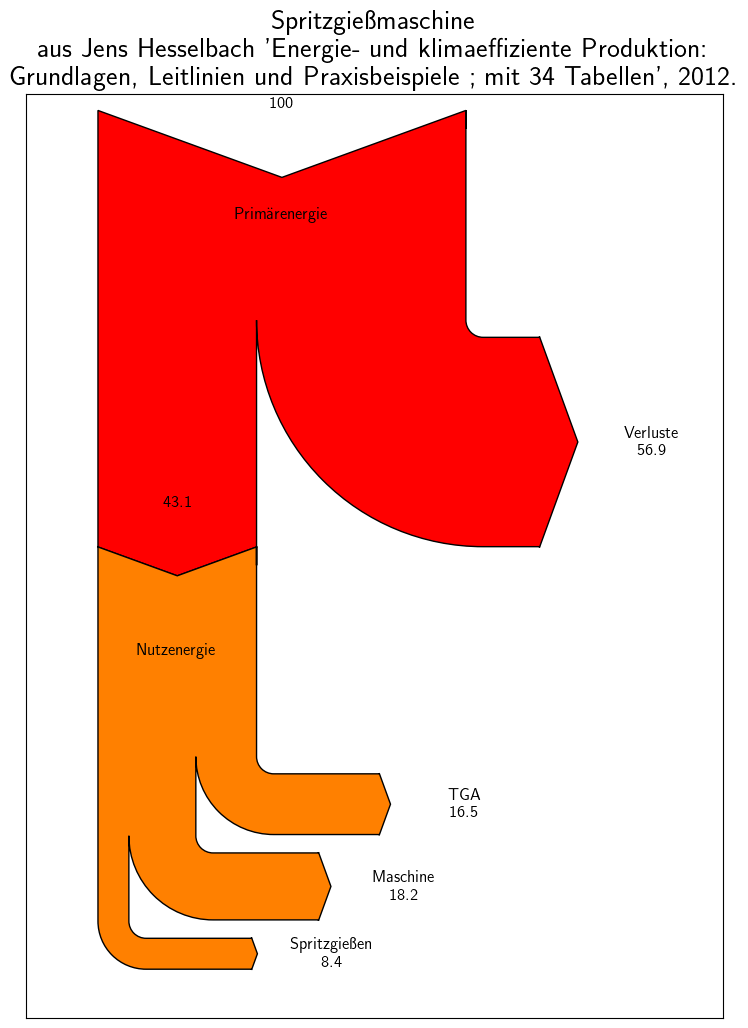

In [13]:
fig = plt.figure(figsize=(9,12))
ax = fig.add_subplot(1,1,1,xticks=[],yticks=[],
                    title="Spritzgießmaschine \naus Jens Hesselbach 'Energie- und klimaeffiziente Produktion: \nGrundlagen, Leitlinien und Praxisbeispiele ; mit 34 Tabellen', 2012.")
energie = [100,100-56.9,16.5,18.2,8.4]
labels = ['Primärenergie', 'Nutzenergie', 'TGA', 'Maschine', 'Spritzgießen']
farben = ["#FF0000", "#FF8000"]

sankey = Sankey(ax = ax, scale = .15, offset = 3, unit ='%', gap = 0.75, radius = 0.7, shoulder = 0.03, head_angle=140, tolerance = 1e-6)
for input_energie, output_energie, label, prior, farbe in zip(energie[:-1], energie[1:], labels, [None, 0], farben):
    if prior != 0:
        sankey.add(flows=[input_energie, -output_energie, output_energie - input_energie], orientations=[0, 0, 1], patchlabel=label, labels=['', None, 'Verluste'], prior=prior, connect=(.5, 0), pathlengths=[0, 0, 3], trunklength=10., rotation=-90, facecolor=farbe)
    else:
        sankey.add(flows=[energie[1], -energie[2], -energie[3], -energie[4]], orientations=[0, 1, 1,1], patchlabel=label, labels=['', labels[2], labels[3], labels[4]], prior=prior, connect=(1, 0), pathlengths=[0, 5, 5, 5], trunklength=10., rotation=-90, facecolor=farbe)
diagrams = sankey.finish()
for diagram in diagrams: 
    diagram.text.set_fontweight('bold')
    diagram.text.set_fontsize(12)
    for text in diagram.texts: 
        text.set_fontsize(12)
ylim = plt.ylim()
plt.ylim(ylim[0]*1.05, ylim[1])
plt.show()

## Lösungen finden

Die VDI 3922 nennt allgemeine Maßnahmen zur rationellen Energienutzung für alle Prozesse und Produkte:

1. **Energienutzung vermeiden**
2. **Energienutzung senken**
3. **Wirkungs- und Nutzungsgrade verbessern**
4. **Energie rückgewinnen**
5. **Temperaturniveaus anpassen** {cite:p}`hesselbach_energie-_2012`
6. **Energieflüsse integrieren** {cite:p}`hesselbach_energie-_2012`

:::{admonition} **AUFGABE**
Sammeln Sie mindestens 10 konkrete Ideen, wie für das Spritzgießunternehmen der Energieverbrauch gesenkt werden könnte.
:::

*Antwort:...*

### Energienutzung vermeiden

Jede unnötige Energienutzung ist zu vermeiden:
- unnötigen Leerlauf vermindern
- in produktionsfreien Zeiten abschalten
- unnötige Aufheiz- und Abkühlvorgänge vermeiden
- Prozessparameter und Sicherheitsreserven überprüfen zusammen mit den Prozessexperten

*im Beispiel der Spritzgießmaschinen bei {cite:p}`hesselbach_energie-_2012` mit knapp 1200 MWh/a Kühllast (elektrische Energieaufnahme) durch Kompressionskälte*: Verbesserung durch Freikühlung um 44%, durch Trennung der Kühlkreisläufe um weitere 76%, durch Absorptionskälte um weitere 89%, auf gesamt 11%

Alternativen für Heizenergieeinsparungen {cite:p}`dimmler_antriebs_2011`:
- Isolieren ca. 22%
- Absaugung mit Isolierung ca. 22%
- Induktionsheizung ca. 21%

### Energienutzung senken

Dazu gehört die Wahl von energetisch günstigeren Technologien
- mechanische (z. B. Schleudern) statt thermische Trocknung
- Wärmedämmung
- elektronische statt konventioneller verlustarmer Vorschaltgeräte für Leuchtstoffröhren - oder gleich LED-Technik
- Reinigung bei niedrigeren Temperaturen (mit anderem Reinigungsmittel)

Bei Kunststoffverarbeitung bietet es sich an, auch das Produktdesign und somit die Auswahl des Rohstoffs zu hinterfragen {cite:p}`hesselbach_energie-_2012`:

**ökologischer Rucksack**: Herstellung eines Kunststoffs ist materialabhängig mehr oder weniger energieaufwendig (im Mittel 72% der Treibhausgasemissionen), $CO_2$-Fussabdruck pro kg Kunststoff zwischen ca. 1 und 12 kg $CO_2$ bei Neu-Kunststoffen, Rezyklate sind wieder anders zu bewerten

**Beispiel**: wenn doppelt soviel Plastik recyclet würde, dann würde das so viel CO$_2$ einsparen wie die Umstellung der Verbrennungsmotoren in Pkw auf Elektroantrieb [4 Minuten-Video auf 3sat, bis 2025 verfügbar](https://www.3sat.de/wissen/nano/200902-warum-wir-ein-recycling-problem-haben-100.html)

**im Betrieb direkt wirksame Einflüsse**: 
- materialabhängige Schmelzenthalpien $\to$ energetischer Aufwand zum Schmelzen und Erstarren entsprechend unterschiedlich, z. B. 0,125 kWh/kg für das Schmelzen von 1 kg Polystyrol bzw. 0,22 kWh/kg für 1 kg Polyamid
- materialabhängige Schmelztemperaturen

Wählt man also einen Kunststoff mit geringerer Schmelzenthalpie, kann die obige Heizkurve entweder verkürzt oder mit geringerer Leistung gefahren werden.

einige Kunststoffgranulate müssen **vor der Verarbeitung getrocknet** werden - **mit hohem Wärmebedarf** {cite:p}`hesselbach_energie-_2012` - auch hier kann durch eine veränderte Materialwahl der Bedarf reduziert werden

### Wirkungs- und Nutzungsgrade verbessern

Dies beinhaltet
- Auslastung der Produktionsanlagen optimieren
- Verteilungsverluste reduzieren, z. B. Druckluftleckagen, Blindleistungsverluste
- sorgfältig Instand halten
- Koppeln von Kraft- und Wärmeproduktion, Brennwertnutzung
- optimal geeignete Energieträger einsetzen (z. B. Öl als Kühlmedium statt Wasser, falls höhere Temperaturen gefragt sind oder angepasste Brennstoffe, mit Gas heizen statt Strom)
- lastabhängige Drehzahlregelung (mit Frequenzumrichtern einfach realisierbar)
- effizientere Motoren

Konkret bei Spritzgießmaschinen sind folgende Lösungsansätze vielversprechend:
- effizientere Elektromotoren siehe [EU Ökodesign Richtlinie](https://ec.europa.eu/info/energy-climate-change-environment/standards-tools-and-labels/products-labelling-rules-and-requirements/energy-label-and-ecodesign/energy-efficient-products/electric-motors_en)
- Energierückgewinnung mit Servomotoren siehe {cite:p}`kunststoff-magazin_neues_2015`
- effizientere Hydraulik
- rein elektrische Maschinen bis zu 60% effizienter, v.a. falls Materialdurchsatz eher niedrig (kleinere Teile)
- Antrieb für mehrere Spritzgießwerkzeuge gleichzeitig siehe {cite:p}`kunststoff-magazin_neues_2015`

- die bestehende Anlage könnte historisch gewachsen aus mehreren dezentralen Trocknern und einem zentralen Trockner bestehen
- die kleinen Trockner haben typischerweise einen kleinen Energienutzungsgrad ({cite:p}`hesselbach_energie-_2012` nennt ca. 50%)
- die großen Trockner haben einen höheren Energienutzungsgrad ({cite:p}`hesselbach_energie-_2012` nennt ca. 70%)
- erweitert man die zentrale Trocknungsanlage, so können die dezentralen Trockner abgeschaltet werden und es ergibt sich eine Energieeinsparung ({cite:p}`hesselbach_energie-_2012` erreichte eine Einsparung von 393 MWh/a auf 293 MWh/a)

Elektrische Dosierantriebe sind effizienter (bis $\eta=96\%$) als hydraulische (bis $\eta=0,86\%$) {cite:p}`dimmler_antriebs_2011`.

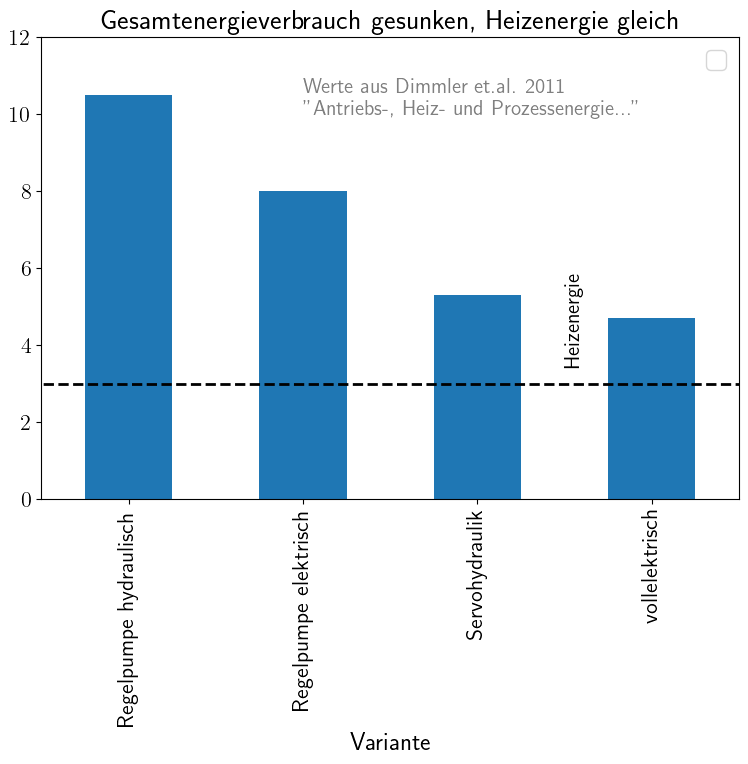

In [14]:
fig,ax = plt.subplots(figsize=(9,6))
bessereantriebespritzgiess = [['Regelpumpe hydraulisch', 10.5],['Regelpumpe elektrisch', 8],['Servohydraulik',5.3],['vollelektrisch',4.7]]
bessereantriebespritzgiessdf = pd.DataFrame(bessereantriebespritzgiess,columns = ['Variante', 'Energie [kWh]'])
bessereantriebespritzgiessdf.plot.bar(x='Variante', y='Energie [kWh]', title = 'Gesamtenergieverbrauch gesunken, Heizenergie gleich', ax=ax)
ax.set_ylim(0,12)
ax.plot([-1,5],[3,3],'k--')
ax.text(2.5,3.5,'Heizenergie',rotation=90, fontsize='15')
ax.legend([])
ax.text(1,10,'Werte aus Dimmler et.al. 2011 \n"Antriebs-, Heiz- und Prozessenergie..."', color='gray', fontsize='15')
plt.show()

**Einsparpotenziale beim Prozess**: 
- Je nachdem, wann eine Fertigungslinie geplant wurde und wie sie aktuell ausgelastet ist, ergeben sich Produktionssystem-Optimierungs-Potenziale, die auch die Energieeffizienz häufig verbessern.
- Ziele: gleichmäßige Auslastung einer Linie erreichen, Wartezeiten innerhalb der Linie reduzieren, unnötige Wege (Menschen oder Produkte) minimieren
- gute Möglichkeit der Einbindung der Mitarbeiter, ohnehin häufig üblich über sog. kontinuierlichen Verbesserungsprozess (jap. Kaizen, engl. continuous improvement process CIP, deutsch KVP)
- über Verbesserungsvorschlagswesen werden Mitarbeiter an finanziellen Einsparungen des Unternehmens beteiligt
- Mitarbeiter an den Linien und Prozessingenieure wissen am ehesten, was geht und was nicht geht, wenn es darum geht, am Prozess Parameter zu verändern, z. B. eine Maschine woanders aufzustellen

### Energie rückgewinnen

Dazu gibt es allgemein folgende Möglichkeiten
- Wärme rückgewinnen mit folgender Priorität
 1. im selben Prozess nutzen
 2. betriebsintern nutzen, z. B. Luft vorwärmen, Wärmepumpe
 3. Abwärme auskoppeln und an Dritte liefern (Wärmeübertragung, ggf. aufwerten mit zusätzlich eingesetzter Energie)
- Reststoffe energetisch nutzen
- Energie bei Entspannung (z. B. Erdgas) rückgewinnen

**Einsparpotenziale bei der Energieversorgung**: 
- trotz Abwärme von Spritzgießanlagen Heizbedarf zu erwarten
- falls eigenständige Wärmeversorgung gewünscht: Wärmepumpe ggf. sinnvoll
- Kopplung mit Heizung (Winter) und Kühlung (Sommer) überlegen
- zusätzlich Wandlerverluste reduzieren: Druckluftantriebe durch Servomotoren ersetzen, Wärmerückgewinnung zwischen Blasformmaschinen und Granulattrocknung, allerdings: Erhöhung des Heizbedarfs (weniger Abwärme)
- {cite:p}`hesselbach_energie-_2012` erreichte bei Nutzung eines BHKW eine Kostenreduktion um ca. 30% bei Spritzgießmaschinen

### Temperaturniveaus anpassen

Es ist zu prüfen, ob folgendes möglich ist:
- Kühlwassertemperatur erhöhen
- Freikühlung statt Kompressionskälte verwenden

**Einsparpotenziale beim Kühlsystem**: 
- **Freikühlsysteme im mitteleuropäischen Klima**: über einen großen Zeitraum des Jahres führen zu einer Entlastung der Kompressionskältemaschinen
- **getrennte Kühlkreisläufe für Werkzeug und Maschine**: Werkzeug weiterhin mit 12°C kühlen, Freikühlung ganzjährig zur Kühlung der restlichen Maschine (Hydraulik, Steuerung, Tragkörper) mit max. 30°C
- **Wärmerückgewinnung**: Abwärme für eine Absorptionskältemaschine mit einem COP von 0,65 einsetzen zur Teilsubstitution der Kompressionskältetechnik

### Energieflüsse integrieren

Dies ist in der Regel am kompliziertesten, da ein tiefes Systemverständnis sowie Überblick über die gesamte Anlage nötig sind. Beispiele können sein:
- kalte (ohne Maschinen) und warme (mit Maschinen) Räume miteinander verbinden, so dass der eine im Sommer gekühlt, der andere im Winter gewärmt wird
- Abwärme aus der Drucklufterzeugung zur Erwärmung in einem anderen Prozess nutzen

**Potenziale bei der Extruderbeheizung**:
- zur Zeit Strom üblich
- direkte Beheizung mit Erdgas nur in Einzelfällen für sehr große Maschinen
- bzw. die (alte, sicherheitstechnisch anspruchsvollere) Lösung der Nutzung eines Thermalölkreislaufs ($\vartheta \approx 300°C$) $\to$ im Beispiel in {cite:p}`hesselbach_energie-_2012` Primärenergieersparnis von ca. 50%
- Möglichkeit zur *Abwärmenutzung*: Beheizung des Thermalöls in KWK-Anlage (Gasturbine) $\to$ ganzjährige Ausnutzung der KWK verbessert, ggf. zusätzlich Granulattrockner versorgen

**Einsparpotenziale bei der technischen Gebäudeausrüstung (TGA)**: Wärmebedarf z. B. durch thermische Gebäudesimulation ermitteln (Undichtigkeit der Gebäude, Luftwechselrate bei natürlicher Ventilation durch Fenster, Türen, Tor) und durch Verbrauchsdaten verifizieren
- **Heizenergie reduzieren**: Nachtabsenkung, Absenkung in Lagerbereichen
- **Wärmebrücken reduzieren**: Abdichtung Gebäudehülle, Optimierung Gebäudedämmung, temperaturgesteuerte Lüftungsklappen
- **Energieströme integrieren**: Räume mit wenig Maschinen (wenig Abwärme, daher Heizbedarf) mit Räumen mit viel Abwärme durch Maschinen verbinden $\to$ weniger Kühlbedarf im Sommer, weniger Heizbedarf im Winter

## Anhand der Anforderungen analysieren und bewerten

### Gesamtkonzept entwickeln: systemische Analyse (VDI 3922)

alle oben entwickelten Ideen auf technische und wirtschaftliche Machbarkeit hin untersuchen

alle dann noch machbaren Ideen miteinander kombinieren in unterschiedlichen Gesamtkonzepten

Gesamtkonzepte bezüglich folgender Punkte vergleichbar machen:
- erzielbare betriebswirtschaftliche Effekte (VDI 2067 Annuitätenrechnung)
- erforderlicher Invest
- Energieverbrauchs-Minderung
- energiebedingte Umweltbelastungen
- Auswirkungen auf Technologie und Produktqualität
- Sensitivitäten darstellen für unsichere Entwicklungen

Je nach Fall weitere Kriterien betrachten:
- Versorgungssicherheit
- Emissionsbilanz
- zu erwartende behördliche Vorschriften, Förderprogramme
- Innovationsgrad und -risiko
- zu erwartende regionale Energieversorgungskonzepte (Strukturwandel!)
- markt- und branchenspezifische Entwicklungstendenzen
- Image des Unternehmens
- soziale und innerbetriebliche Akzeptanz
- unternehmensspezifische Weiterentwicklung (z. B. neue Standorte)
- Flexibilität der Konzepte

:::{admonition} **AUFGABE**
Wie könnten sich Energiesparmaßnahmen auf die Produktqualität des Spritzgießunternehmens auswirken? Warum?
:::

*Antwort:...*

### Iteratives Vorgehen

nach jedem Schritt überprüfen, ob der Ist-Zustand nun anders beschrieben werden muss, ob daraufhin andere Vorschläge sinnvoll sind, etc.

![VorgehenEnergieberatung](../img/vorgehen-energieberatung.png)

:::{bibliography}
:filter: docname in docnames
:::